In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv(r'C:\Users\hp\Documents\Datasets\house_prices_dataset.csv')
df.head()

,size,location_score,price
0,1649.0,3.428386,374081.1473
1,1458.0,NaN,347868.3234
2,1694.0,5.484301,400995.9973
3,1956.0,1.693525,366134.7150
4,NaN,1.526958,313579.7440


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            1473 non-null   float64
 1   location_score  1473 non-null   float64
 2   price           1474 non-null   float64
dtypes: float64(3)
memory usage: 36.5 KB


In [53]:
df.isna().sum()

size              77
location_score    77
price             76
dtype: int64

In [54]:
df.duplicated().sum()

50

In [55]:
data = df.dropna().drop_duplicates()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1288 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            1288 non-null   float64
 1   location_score  1288 non-null   float64
 2   price           1288 non-null   float64
dtypes: float64(3)
memory usage: 40.2 KB


In [57]:
data.isna().sum()

size              0
location_score    0
price             0
dtype: int64

In [58]:
data.duplicated().sum()

0

<Axes: >

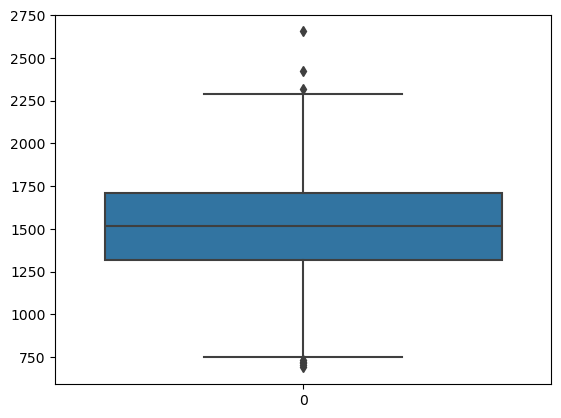

In [59]:
sns.boxplot(data['size'])

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='location_score', ylabel='Count'>

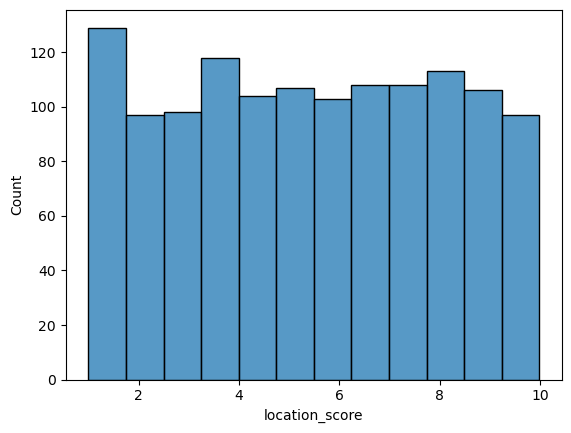

In [60]:
sns.histplot(data['location_score'])

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


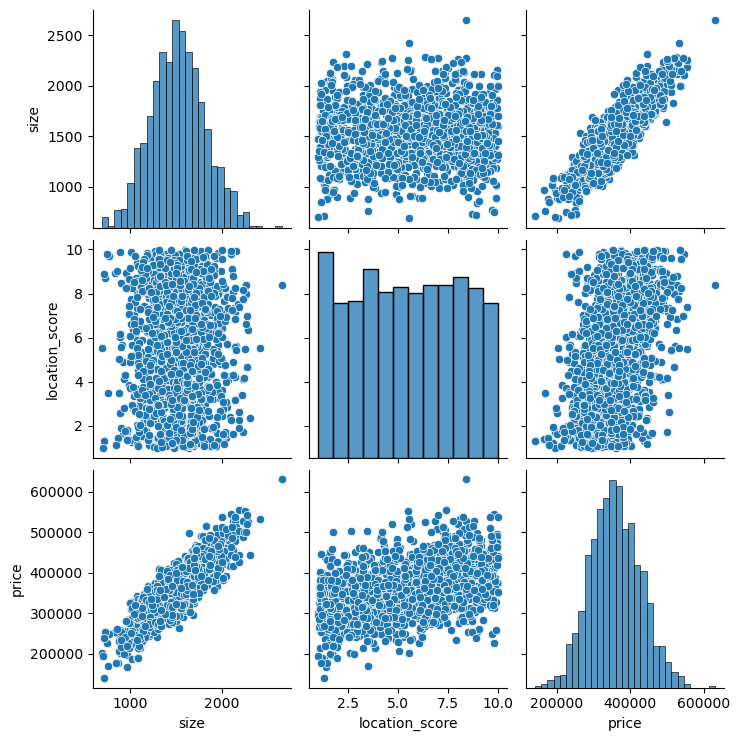

In [61]:
sns.pairplot(data)

In [62]:
corr = df.corr()
corr

,size,location_score,price
size,1.000000,0.041234,0.872832
location_score,0.041234,1.000000,0.408971
price,0.872832,0.408971,1.000000


<Axes: >

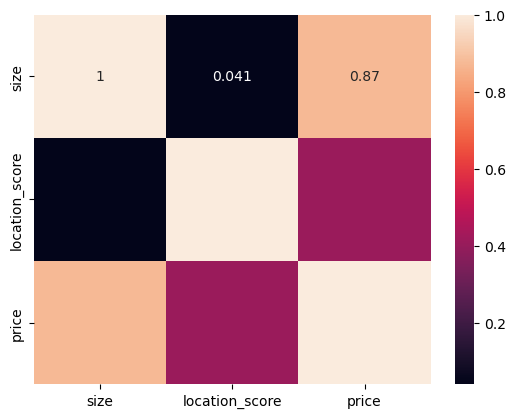

In [63]:
sns.heatmap(corr, annot=True)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [65]:
y = data['price']
X = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=26)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

In [68]:
print(f'R2 score is :{r2:.2f}')
print(f'Mean Squared Error is: {mse:.2f}')

R2 score is :0.92
Mean Squared Error is: 420953228.79


In [69]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error is: {rmse:.2f}")

Root Mean Squared Error is: 20517.14


In [70]:
max_price = y_test.max()
rmse_percent = (rmse / max_price) * 100
print(f'RMSE value is {rmse_percent:.2f}% of max y value')

RMSE value is 3.26% of max y value


In [71]:
model.coef_

array([  199.36860605, 10097.3727084 ])

In [72]:
model.intercept_

509.7930563027621

# Model Assumptions

### The errors should have no patterns

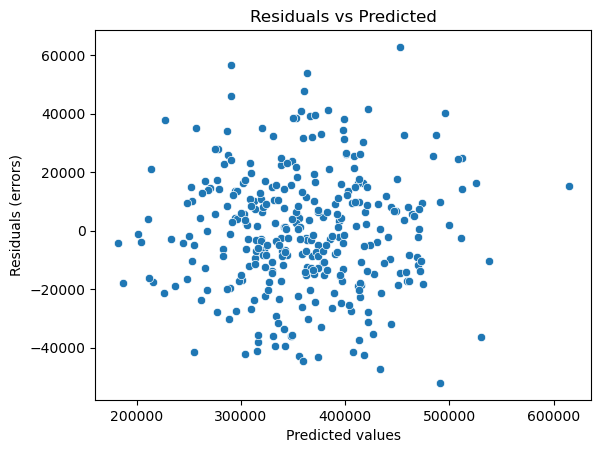

In [75]:
residuals = y_test - pred
sns.scatterplot(x=pred, y=residuals)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals (errors)")
plt.show()

### Residuals should follow a normal distribution

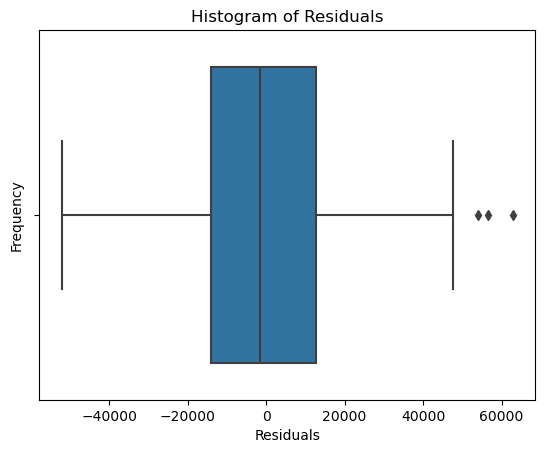

In [77]:
sns.boxplot(x=residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### No Multicolinearity in independent variable

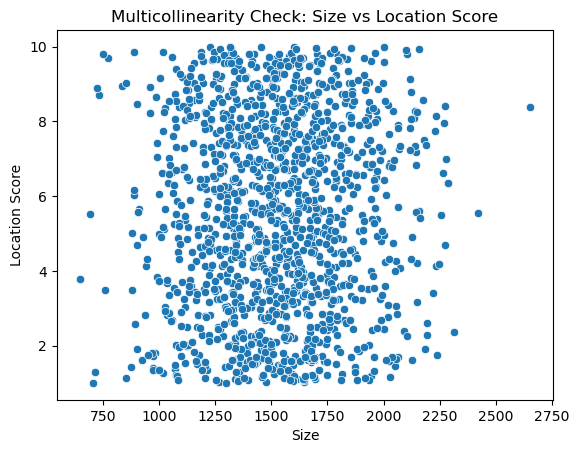

In [79]:
sns.scatterplot(data=df, x='size', y='location_score')
plt.title("Multicollinearity Check: Size vs Location Score")
plt.xlabel("Size")
plt.ylabel("Location Score")
plt.show()